In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import wntr
from pathlib import Path
import wntr.network.controls as controls
from dreaminsg_integrated_model.src.network_sim_models.interdependencies import *
from dreaminsg_integrated_model.src.disrupt_generator import *
import pandapower as pp

import math

In [27]:
network_dir= 'micropolis'

MAIN_DIR = Path('..')
water_file = MAIN_DIR/'dreaminsg_integrated_model/data/networks/{0}/water/micropolis.inp'.format(network_dir)

step_size = 3600
try:
    wn = wntr.network.WaterNetworkModel(water_file)
    wn.options.time.duration = 3600
    wn.options.time.report_timestep = step_size
    wn.options.time.hydraulic_timestep = step_size
    wn.options.hydraulic.demand_model = 'DDA'
    total_base_water_demand = sum([wn.get_node(node).base_demand for node in wn.junction_name_list])
    print(total_base_water_demand)
    print("Water network successfully loaded.")
except FileNotFoundError:
    print("Error: The water network file does not exist. No such file or directory: ", water_file)

0.06879947009039752
Water network successfully loaded.


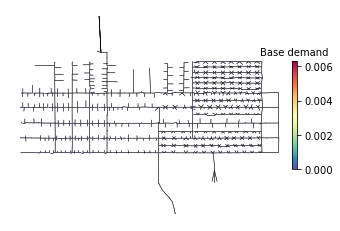

In [7]:
ax = wntr.graphics.plot_network(wn, node_attribute='base_demand',
node_colorbar_label='Base demand', node_size = 0.5, link_width = 0.5)

In [40]:
wntr.graphics.plot_interactive_network(wn, node_attribute='status', node_range=[0,500], filename='status.html', auto_open=False)

In [28]:

print("Simulation time: ", wn.options.time.duration,"; Hydraulic time step: ", wn.options.time.hydraulic_timestep, "; Report time step: ", wn.options.time.report_timestep)
wn_sim = wntr.sim.WNTRSimulator(wn) #wntr.sim.epanet.EpanetSimulator(wn) 
wn_results = wn_sim.run_sim()

print(wn_results.node['demand'])

Simulation time:  3600.0 ; Hydraulic time step:  3600.0 ; Report time step:  3600


RuntimeError: Simulation did not converge. Jacobian is singular at iteration 0

In [18]:
wn_results.node['demand'].to_csv('results.csv')

<AxesSubplot:>

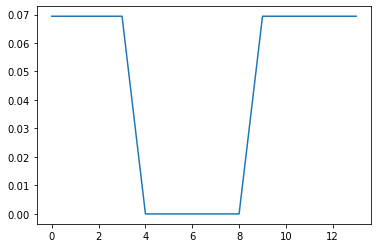

In [146]:
pd.Series(water_consump_tracker).plot()

In [147]:
wn.control_name_list

['control 1',
 'control 2',
 'W_WP9_power_off_19500.0',
 'W_WP9_power_on_29220.0',
 'W_WP9_power_off_29220.0',
 'W_WP9_power_on_38940.0',
 'W_WP9_power_off_38940.0',
 'W_WP9_power_on_48660.0',
 'W_WP9_power_off_48660.0',
 'W_WP9_power_on_58380.0',
 'W_WP9_power_off_58380.0',
 'W_WP9_power_on_68100.0',
 'junctionW_P22_leak_nodestart_leak_control',
 'junctionW_P22_leak_nodeend_leak_control']